# Working With Dates in Pandas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Create your own date

In [2]:
#import datetime
from datetime import datetime

In [5]:
#calculate now
today = datetime.now()
today

datetime.datetime(2022, 9, 21, 11, 32, 4, 419047)

In [6]:
#display datatype
type(today)

datetime.datetime

In [8]:
#manually set date with (year, month, day)
date = datetime(month=12, year=2002, day=2)

In [9]:
#display datatype
type(date)

datetime.datetime

In [10]:
date2 = pd.Timestamp(month=12, year=2020, day=30)
date2

Timestamp('2020-12-30 00:00:00')

In [11]:
type(date2)

pandas._libs.tslibs.timestamps.Timestamp

## Transform to date format

### One date

In [12]:
date = 'Jan 1 1970'

In [14]:
#display datatype
type(date)

str

In [17]:
#use pd.to_datetime() to convert
new = pd.to_datetime(date)
new

Timestamp('1970-01-01 00:00:00')

In [18]:
#display datatype
type(new)

pandas._libs.tslibs.timestamps.Timestamp

### One date, but confuse pandas

In [19]:
date = 'Jan:7:1970'

In [23]:
#use pd.to_datetime() to convert
pd.to_datetime(date.replace(':',' '))

Timestamp('1970-01-07 00:00:00')

We can fix this error using the `format` argument.

For info on formatting: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [28]:
#use format arguement
date = pd.to_datetime(date, format='%b:%d:%Y')
date

Timestamp('1970-01-07 00:00:00')

In [30]:
date.strftime('%b/%d/%Y')

'Jan/07/1970'

### Now a whole columns of dates

In [31]:
url = "https://gist.githubusercontent.com/ryanorsinger/\
b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)

In [32]:
#look at data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                261 non-null    object 
 1   coffee_consumption  261 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [35]:
#look at datatypes

In [41]:
#use pd.to_datetime() to convert
df.date = pd.to_datetime(df.date)

In [38]:
#can also use .astype() to convert
df.date.astype('datetime64')

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-07
         ...    
256   2019-12-25
257   2019-12-26
258   2019-12-27
259   2019-12-30
260   2019-12-31
Name: date, Length: 261, dtype: datetime64[ns]

In [42]:
#look at datatypes
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

## Now that they are in a date format, let's manipulate them

### use `.dt` to extract pieces of the date

the documentation: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

In [43]:
df.date.dt.year

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
256    2019
257    2019
258    2019
259    2019
260    2019
Name: date, Length: 261, dtype: int64

In [44]:
df.date.dt.month

0       1
1       1
2       1
3       1
4       1
       ..
256    12
257    12
258    12
259    12
260    12
Name: date, Length: 261, dtype: int64

### we can add them back to our initial dataframe

In [45]:
#add them all
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day

In [46]:
df.head()

,date,coffee_consumption,year,month,day
0,2019-01-01,14.301915,2019,1,1
1,2019-01-02,12.905900,2019,1,2
2,2019-01-03,10.046015,2019,1,3
3,2019-01-04,6.354805,2019,1,4
4,2019-01-07,8.545563,2019,1,7


### Reformat date using `dt.strftime()`

In [47]:
df.date.dt.strftime('%Y%m%d')

0      20190101
1      20190102
2      20190103
3      20190104
4      20190107
         ...   
256    20191225
257    20191226
258    20191227
259    20191230
260    20191231
Name: date, Length: 261, dtype: object

## Time to make it more complex!

In [48]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1kTrAFSrr-xP3REs0Lly0TdV4ekrHahBXLg9r5qKxmV8/edit#gid=0'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)
df

,Date,Symbol,Close,Volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44
...,...,...,...,...
23669,2017-07-01 05-PM,ETHUSD,272.57,1894983.33
23670,2017-07-01 04-PM,ETHUSD,265.74,1287300.75
23671,2017-07-01 03-PM,ETHUSD,268.79,1500282.55
23672,2017-07-01 02-PM,ETHUSD,274.83,1702536.85


In [49]:
df.columns = df.columns.str.lower()

In [50]:
df

,date,symbol,close,volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44
...,...,...,...,...
23669,2017-07-01 05-PM,ETHUSD,272.57,1894983.33
23670,2017-07-01 04-PM,ETHUSD,265.74,1287300.75
23671,2017-07-01 03-PM,ETHUSD,268.79,1500282.55
23672,2017-07-01 02-PM,ETHUSD,274.83,1702536.85


#### let's plot the our close value

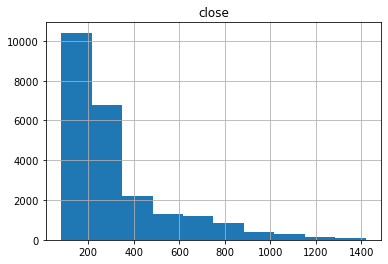

In [53]:
df.close.hist()
plt.title('close')
plt.show()

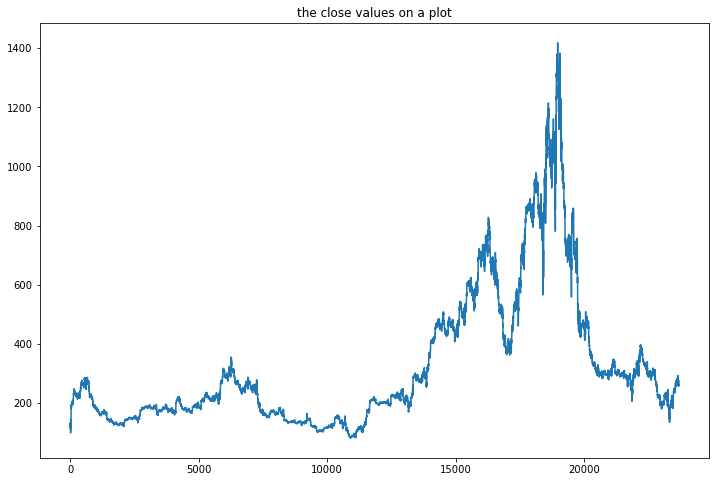

In [51]:
plt.figure(figsize=(12,8))
df.close.plot()

plt.title('the close values on a plot')
plt.show()

> when we plot a single series using .plot(), the x-axis is the index value

## How do we make pandas time aware for time analysis?

1. Convert 'date/time' column to datetime object in Pandas (pd.to_datetime())
2. Set the datetime column as index
3. Sort the datetime index

### 1. Convert to datetime

In [57]:
df.head()

,date,symbol,close,volume
0,2020-03-13 12:00:00,ETHUSD,128.71,3906590.52
1,2020-03-13 00:00:00,ETHUSD,129.94,10329663.70
2,2020-03-13 11:00:00,ETHUSD,119.51,3311080.29
3,2020-03-13 10:00:00,ETHUSD,124.47,3483436.48
4,2020-03-13 09:00:00,ETHUSD,124.08,2767584.44


In [56]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %I-%p')

> format argument allows us to tell pandas the makeup of our date, so it can be understood

In [58]:
df.dtypes

date      datetime64[ns]
symbol            object
close            float64
volume           float64
dtype: object

### 2. Set the datetime column as Index

In [64]:
df = df.set_index('date')

### 3. Sort the datetime index

In [66]:
df = df.sort_index()

#### Now let's plot it again!

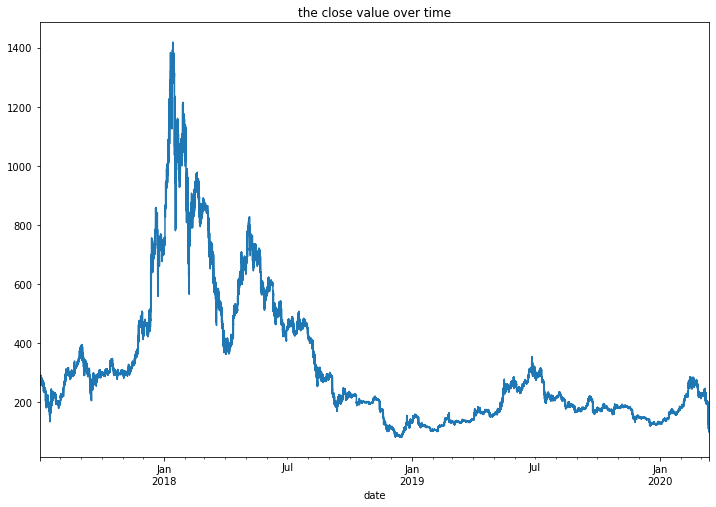

In [67]:
plt.figure(figsize=(12,8))

df.close.plot()

plt.title('the close value over time')
plt.show()

## Let's look at the the mean close value on each day of the week

In [68]:
df.head()

,symbol,close,volume
date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55


In [70]:
#pull out weekday name & save
df['weekday'] = df.index.day_name()

In [71]:
df.groupby('weekday').close.mean()

weekday
Friday       321.134596
Monday       326.186823
Saturday     327.707441
Sunday       326.316418
Thursday     323.334524
Tuesday      325.189722
Wednesday    324.622361
Name: close, dtype: float64

#### let's plot it!

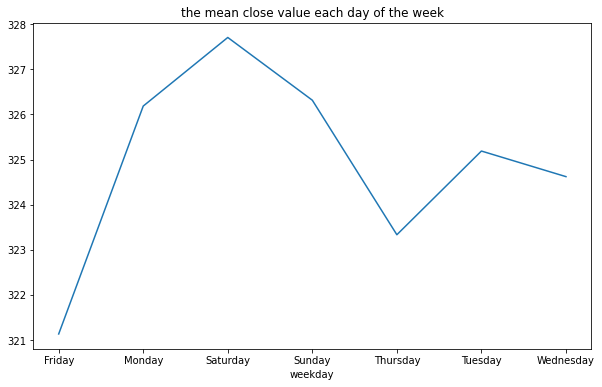

In [79]:
plt.figure(figsize=(10,6))

df.groupby('weekday').close.mean().plot()

plt.title('the mean close value each day of the week')
plt.show()

### But Misty, I don't like that the days aren't in order

In [74]:
#use dayofweek attribute
df['weekdaynum'] = df.index.dayofweek

In [75]:
df.head()

,symbol,close,volume,weekday,weekdaynum
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday,5
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday,5


#### let's plot it better this time!

In [ ]:
df.groupby('weekdaynum')

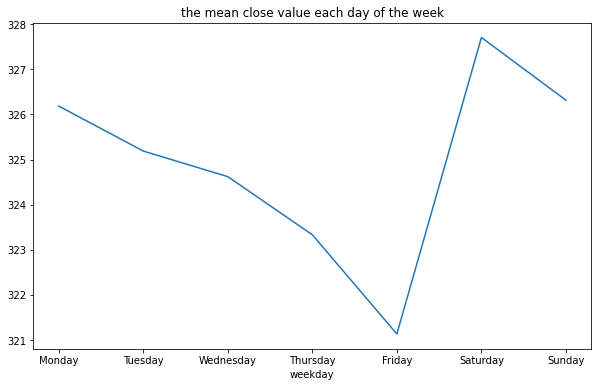

In [80]:
plt.figure(figsize=(10,6))

df.groupby('weekday').mean().sort_values('weekdaynum').close.plot()

plt.title('the mean close value each day of the week')
plt.show()

## How do we get a subset of the dataframe?

In [84]:
df.sample(5)

,symbol,close,volume,weekday,weekdaynum
date,,,,,
2018-04-07 21:00:00,ETHUSD,391.69,470322.49,Saturday,5
2018-01-08 19:00:00,ETHUSD,1079.00,19376479.70,Monday,0
2018-07-25 22:00:00,ETHUSD,472.96,877659.49,Wednesday,2
2017-09-14 10:00:00,ETHUSD,236.21,2975064.78,Thursday,3
2019-05-07 21:00:00,ETHUSD,171.75,848077.20,Tuesday,1


In [86]:
#single .loc value
df.loc['2018-04-07 21:00:00']

symbol           ETHUSD
close            391.69
volume        470322.49
weekday        Saturday
weekdaynum            5
Name: 2018-04-07 21:00:00, dtype: object

> `.loc` lets you send an index value and then it will give you the corresponding rows

In [89]:
#range of .loc values
df.loc['2017-07':'2017-09']

,symbol,close,volume,weekday,weekdaynum
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday,5
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday,5
...,...,...,...,...,...
2017-09-30 19:00:00,ETHUSD,302.79,301850.54,Saturday,5
2017-09-30 20:00:00,ETHUSD,302.97,737006.90,Saturday,5
2017-09-30 21:00:00,ETHUSD,300.10,1407368.63,Saturday,5


In [90]:
#using .loc for one year
df.loc['2017']

,symbol,close,volume,weekday,weekdaynum
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday,5
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday,5
...,...,...,...,...,...
2017-12-31 19:00:00,ETHUSD,719.50,2363924.30,Sunday,6
2017-12-31 20:00:00,ETHUSD,727.47,3330359.12,Sunday,6
2017-12-31 21:00:00,ETHUSD,743.50,2908764.02,Sunday,6


## What if we want a different period of data?

In [91]:
#drop extra columns
df = df[['close']]

### Downsampling: reduce frequency

use `asfreq` to change the period

In [92]:
#set frequency to daily
df.asfreq('D').head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-02 11:00:00,282.30
2017-07-03 11:00:00,279.50
2017-07-04 11:00:00,269.57
2017-07-05 11:00:00,265.20


In [93]:
#set frequency to monthly
df.asfreq('M').head()

,close
date,
2017-07-31 11:00:00,199.96
2017-08-31 11:00:00,388.19
2017-09-30 11:00:00,300.37
2017-10-31 11:00:00,303.45
2017-11-30 11:00:00,420.42


#### let's plot it by month!

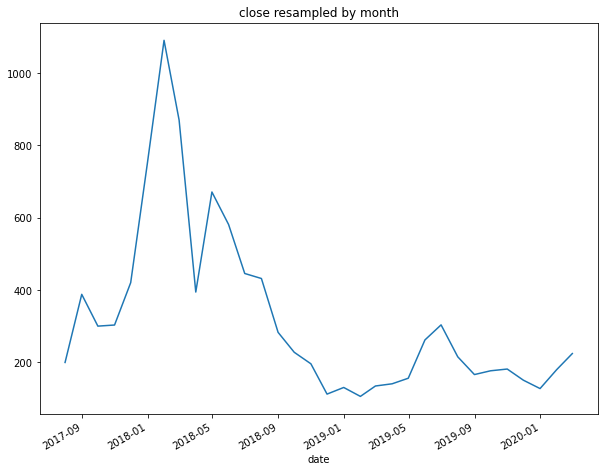

In [95]:
plt.figure(figsize=(10,8))

df.asfreq('M').close.plot()

plt.title('close resampled by month')
plt.show()

#### What if I want the first day of the month?

[Pandas asfreq Offset Aliases](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

[Pandas asfreq Anchored Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)

In [97]:
#set to first day of the month
df.asfreq('MS').head()

,close
date,
2017-07-01 11:00:00,257.13
2017-08-01 11:00:00,228.84
2017-09-01 11:00:00,391.83
2017-10-01 11:00:00,300.76
2017-11-01 11:00:00,289.15


#### let's plot it!

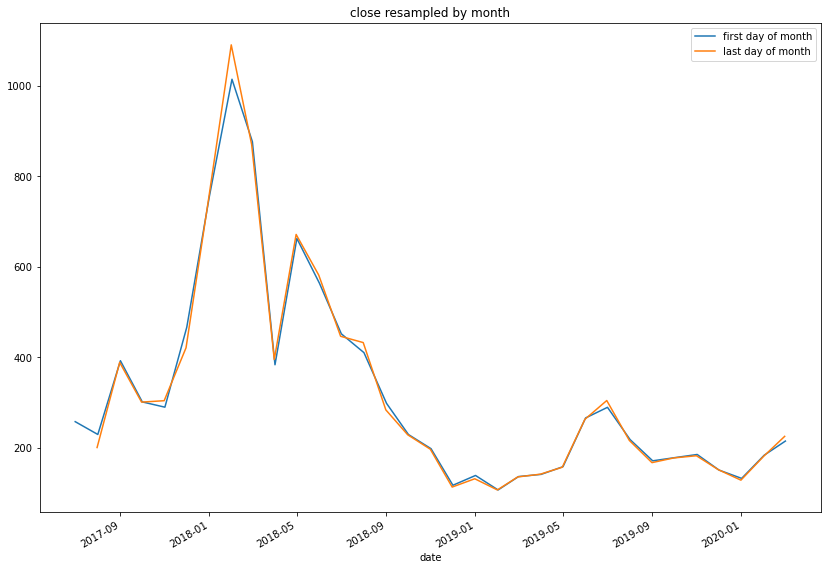

In [113]:
plt.figure(figsize=(14,10))
df.asfreq('MS').close.plot(label='first day of month')
df.asfreq('M').close.plot(label='last day of month')
plt.title('close resampled by month')
plt.legend()
plt.show()

### Upsampling: Increase frequency

In [104]:
df.asfreq('T').head()

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 11:01:00,NaN
2017-07-01 11:02:00,NaN
2017-07-01 11:03:00,NaN
2017-07-01 11:04:00,NaN


> generates null for values we don't have, but we can fill them!

In [105]:
#use ffill method
df.asfreq('30T', method='ffill')

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 11:30:00,257.13
2017-07-01 12:00:00,263.12
2017-07-01 12:30:00,263.12
2017-07-01 13:00:00,275.01
...,...
2020-03-13 18:00:00,128.93
2020-03-13 18:30:00,128.93
2020-03-13 19:00:00,134.03


In [106]:
# use bfill method
df.asfreq('30T', method='bfill')

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 11:30:00,263.12
2017-07-01 12:00:00,263.12
2017-07-01 12:30:00,275.01
2017-07-01 13:00:00,275.01
...,...
2020-03-13 18:00:00,128.93
2020-03-13 18:30:00,134.03
2020-03-13 19:00:00,134.03


### Resampling - Aggregating over time

In [125]:
daily = df.resample('D').mean()
daily

,close
date,
2017-07-01,265.284615
2017-07-02,269.782500
2017-07-03,278.882083
2017-07-04,276.743333
2017-07-05,265.025833
...,...
2020-03-09,200.818333
2020-03-10,201.577500
2020-03-11,195.910417


#### let's plot it!

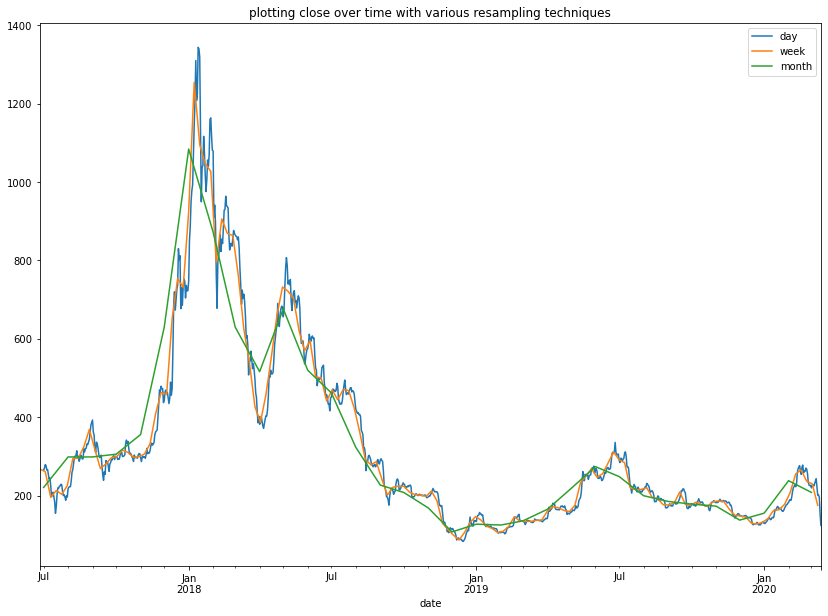

In [126]:
plt.figure(figsize=(14,10))

# daily.close['mean'].plot(label='mean')
# daily.close['min'].plot(label='min')
# daily.close['max'].plot(label='max')
daily.close.plot(label='day')
daily.resample('W').mean().close.plot(label='week')
daily.resample('M').mean().close.plot(label='month')


plt.title('plotting close over time with various resampling techniques')
plt.legend()
plt.show()

### Rolling averages

- Generally used to smooth out short-term fluctuations in time series data and highlight long-term trends
- use `rolling()` to calculate

In [127]:
#define df resampled daily with the mean
daily.head()

,close
date,
2017-07-01,265.284615
2017-07-02,269.782500
2017-07-03,278.882083
2017-07-04,276.743333
2017-07-05,265.025833


In [129]:
#use the rolling function
daily.rolling(5).mean()

,close
date,
2017-07-01,NaN
2017-07-02,NaN
2017-07-03,NaN
2017-07-04,NaN
2017-07-05,271.143673
...,...
2020-03-09,226.537083
2020-03-10,220.824917
2020-03-11,212.754417


> the rolling average is the previous number of units averaged together  
> in this example, the rolling average on 2017-07-05 is the average of 2017-07-01 - 2017-07-05

#### let's plot it!

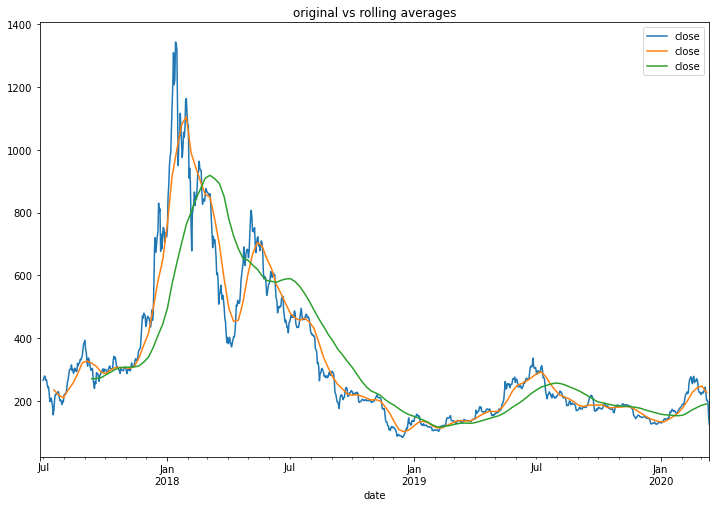

In [131]:
plt.figure(figsize=(12,8))

#original granularity
daily.close.plot()
#resample by week and look at 4 weeks 
daily.resample('W').mean().rolling(4).mean().close.plot()
#resample by week and look at 12 weeks 
daily.resample('W').mean().rolling(12).mean().close.plot()

plt.legend()
plt.title('original vs rolling averages')
plt.show()

### How about Lagging or Leading the data?

* `.shift`: move the data backwards and forwards by a given amount
* `.diff`: find the difference with the previous observation (or a specified further back observation)

In [132]:
daily.head()

,close
date,
2017-07-01,265.284615
2017-07-02,269.782500
2017-07-03,278.882083
2017-07-04,276.743333
2017-07-05,265.025833


In [139]:
#shift by one
daily.shift(1).head()

,close,diff_one
date,,
2017-07-01,NaN,NaN
2017-07-02,265.284615,NaN
2017-07-03,269.782500,4.497885
2017-07-04,278.882083,9.099583
2017-07-05,276.743333,-2.138750


In [134]:
#shift by negative 1
daily.shift(-1).head()

,close
date,
2017-07-01,269.782500
2017-07-02,278.882083
2017-07-03,276.743333
2017-07-04,265.025833
2017-07-05,266.480000


In [135]:
#difference by one
daily['diff_one'] = daily.close.diff(1)

In [136]:
daily.head()

,close,diff_one
date,,
2017-07-01,265.284615,NaN
2017-07-02,269.782500,4.497885
2017-07-03,278.882083,9.099583
2017-07-04,276.743333,-2.138750
2017-07-05,265.025833,-11.717500


In [140]:
# daily['diff_other'] = daily.close - daily.diff_one

In [ ]:
#subtract shift by one from close


## Timezones

#### use `tz_localize("UTC")` to set timezone

In [142]:
df = df.tz_localize('UTC')

#### use `tz_convert` to change timezones 

In [145]:
#convert to 'America/Chicago'
df = df.tz_convert('America/Chicago')

#### extract timezone

In [146]:
df.index.tz

<DstTzInfo 'America/Chicago' LMT-1 day, 18:09:00 STD>

#### use .tz_localize(tz=None) to remove timezone 

In [147]:
df.tz_localize(tz=None)

,close
date,
2017-07-01 06:00:00,257.13
2017-07-01 07:00:00,263.12
2017-07-01 08:00:00,275.01
2017-07-01 09:00:00,274.83
2017-07-01 10:00:00,268.79
...,...
2020-03-13 11:00:00,127.57
2020-03-13 12:00:00,133.80
2020-03-13 13:00:00,128.93


## Timedelta

#### use timedelta to alter a date

In [148]:
#set todays date using datetime
today

datetime.datetime(2022, 9, 21, 11, 32, 4, 419047)

In [149]:
#subtract using pd.Timedelta()
today - pd.Timedelta(days=2)

datetime.datetime(2022, 9, 19, 11, 32, 4, 419047)

In [150]:
#add
today + pd.Timedelta(days=2)

datetime.datetime(2022, 9, 23, 11, 32, 4, 419047)

#### subtract two dates

In [151]:
today

datetime.datetime(2022, 9, 21, 11, 32, 4, 419047)

In [152]:
date

Timestamp('1970-01-07 00:00:00')

In [153]:
today - date

Timedelta('19250 days 11:32:04.419047')